$$cost=\dfrac{1}{N}\sum ^{N}_{n=1}\left( \widehat{y}_{n}-y_{n}\right) ^{2}$$

三、[梯度下降](https://so.csdn.net/so/search?q=%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D&spm=1001.2101.3001.7020)
------------------------------------------------------------------------------------------------------

类似[牛顿迭代法](https://so.csdn.net/so/search?q=%E7%89%9B%E9%A1%BF%E8%BF%AD%E4%BB%A3%E6%B3%95&spm=1001.2101.3001.7020)/ 二分法，对cost func 求导 , 利用偏导进行迭代，使得cost func 达到最小值。

![](https://img-blog.csdnimg.cn/img_convert/9b8fe9d396ca643d6b62693bf627323c.png)

具体的求导过程

![](https://img-blog.csdnimg.cn/img_convert/f16d0ff50dd6280d501a1cd928571a45.png)

关键迭代式：

![](https://img-blog.csdnimg.cn/img_convert/8821b49fbfe7e8853d1e1e82a73a521e.png)


## 梯度下降法

w =  2.0 epoch =  189
After train forward(4) =  7.99999996372013


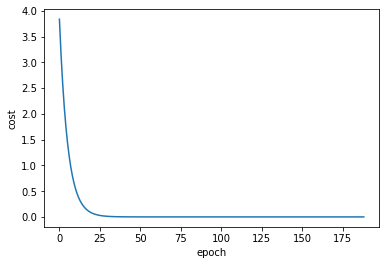

In [1]:
import matplotlib.pyplot as plt

def function(x, w):         #数学模型
    return x * w 

def cost(x, y, w):          #损失函数
    cost = 0.0
    for x_val, y_val in zip(x,y):
        y_pred = function(x_val, w)
        cost += (y_pred - y_val) ** 2
    return cost/len(x)

def gradient(x, y, w):      #梯度函数
    grad = 0.0
    for x_val, y_val in zip(x, y):
        grad += x_val*(x_val*w-y_val)
    return (2*grad)/len(x)

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
alpha = 0.01
w = 1.0
epoch_list = []
cost_list = []
epoch = 0
last_cost = cost(x_data, y_data, w)

while True:
    grad_val = gradient(x_data, y_data, w)
    w -= alpha*grad_val
    this_cost = cost(x_data, y_data, w)
    # print('epoch:', epoch, 'w=', w, 'loss=', this_cost)
    epoch_list.append(epoch)
    cost_list.append(this_cost)
    epoch += 1
    if((last_cost - this_cost) < 1e-16):
        break
    last_cost = this_cost
    
print("w = ","%.1f"%w,"epoch = ",epoch)
print("After train forward(4) = ",function(4, w))
plt.plot(epoch_list,cost_list)
plt.ylabel('cost')
plt.xlabel('epoch')
plt.show()

w =  2.0 b =  0.0 epoch =  6063
After train forward(4) =  7.999999713401953


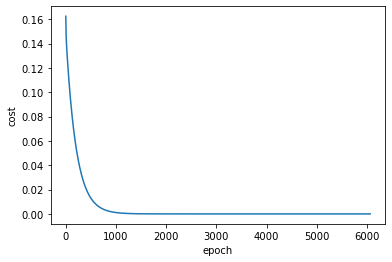

In [2]:
import matplotlib.pyplot as plt

def function(x, w, b):         #数学模型
    return x * w + b 

def cost(x, y, w, b):          #损失函数
    cost = 0.0
    for x_val, y_val in zip(x,y):
        y_pred = function(x_val, w, b)
        cost += (y_pred - y_val) ** 2.0
    return cost/len(x)

def gradient_w(x, y, w,b):      #梯度函数
    grad = 0.0
    for x_val, y_val in zip(x, y):
        grad += x_val*(x_val*w+b-y_val)
    return (2*grad)/len(x)

def gradient_b(x, y, w, b): #
    grad = 0.0
    for x_val, y_val in zip(x, y):
        grad += x_val*w+b-y_val
    return (2*grad)/len(x)

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

alpha = 0.01
w = 1.5
b = 1.0

epoch_list = []
cost_list = []
epoch = 0

last_cost = cost(x_data, y_data, w, b)
while True:
    grad_val_w = gradient_w(x_data, y_data, w, b)
    w -= alpha*grad_val_w
    grad_val_b = gradient_b(x_data, y_data, w, b)
    b -= alpha*grad_val_b
    this_cost = cost(x_data, y_data, w, b)
    # print('epoch:', epoch, 'w=', w, 'loss=', this_cost)
    epoch_list.append(epoch)
    cost_list.append(this_cost)
    epoch += 1
    if((abs(last_cost) - abs(this_cost)) < 1e-16):
        break
    last_cost = this_cost
    
print("w = ","%.1f"%w,"b = ","%.1f"%b,"epoch = ",epoch)
print("After train forward(4) = ",function(4, w, b))
plt.plot(epoch_list,cost_list)
plt.ylabel('cost')
plt.xlabel('epoch')
plt.show()

## 随机梯度下降

predict (before training) 4 4.0
predict (after training) 4 7.9999999999996945


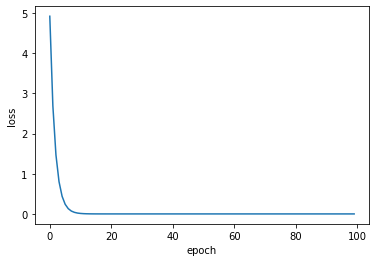

In [3]:
import matplotlib.pyplot as plt
 
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
 
w = 1.0
 
def forward(x):
    return x*w
 
# calculate loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)**2
 
# define the gradient function  sgd
def gradient(x, y):
    return 2*x*(x*w - y)
 
epoch_list = []
loss_list = []
print('predict (before training)', 4, forward(4))
for epoch in range(100):
    for x,y in zip(x_data, y_data):
        grad = gradient(x,y)
        w = w - 0.01*grad    # update weight by every grad of sample of training set
        # print("\tgrad:", x, y,grad)
        l = loss(x,y)
    # print("progress:",epoch,"w=",w,"loss=",l)
    epoch_list.append(epoch)
    loss_list.append(l)
 
print('predict (after training)', 4, forward(4))
plt.plot(epoch_list,loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show() 